<a href="https://colab.research.google.com/github/franklinjerry/guvi/blob/main/linear_Regression_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.head(5)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df['Ground_Temperature']=df['Ground Temperature']

In [ ]:
df.head()

,Chirps/Second,Ground Temperature,Ground_Temperature
0,20.0,88.6,88.6
1,16.0,71.6,71.6
2,19.8,93.3,93.3
3,18.4,84.3,84.3
4,17.1,80.6,80.6


In [ ]:
df.drop(['Ground Temperature'],axis=1,inplace=True)

In [ ]:
df[['Chirps/Second','Ground_Temperature']].corr()

,Chirps/Second,Ground_Temperature
Chirps/Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
x=df.iloc[:,1].values
y=df.iloc[:,0].values
# #Using Linear regression algorithm 
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [ ]:
#Task 1 -->Find the linear regression equation for this data.
print('Our Linear Regression Equation: Y= {:.4f}*X + {:.4f}'
      .format(model.coef_[0],model.intercept_))

Our Linear Regression Equation: Y= 0.2030*X + 0.4593


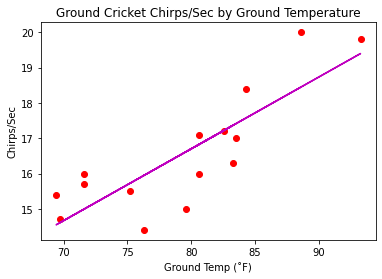

In [ ]:
#Task 2-->Chart the original data and the equation on the chart.
plt.scatter(df['Ground_Temperature'],df['Chirps/Second'], color='r')
plt.plot(df['Ground_Temperature'], model.predict(df['Ground_Temperature'].values.reshape(-1,1)),color='m')
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [ ]:
# Task 3 --> Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print("The R^2 score value is {:.3f}".format(model.score(df['Ground_Temperature'].values.reshape(-1,1),df['Chirps/Second'].values.reshape(-1,1))))
print("since it is less than 0.8 which represents a strong correlation the equation can be regarded as not a good fit for the data .")

The R^2 score value is 0.692
since it is less than 0.8 which represents a strong correlation the equation can be regarded as not a good fit for the data .


In [ ]:
#Task 4 --> Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
print('When the ground temperature reaches 95 degre F , the approximate chirps/sec : {:.3f}'.format(model.predict([[95]])[0]))

When the ground temperature reaches 95 degre F , the approximate chirps/sec : 19.744


In [ ]:
#Task --> Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
#Here we nee value of x from y 
def chirps_to_temp(y):
  temp_val = (y- model.intercept_)/ model.coef_[0] 
  print('for {} value of chirps/sec the temperature is approximately estimated as {:.3f} degree F'.format(y,temp_val)) 

In [ ]:
chirps_to_temp(18)

for 18 value of chirps/sec the temperature is approximately estimated as 86.407 degree F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("/content/brain_body.txt")
df.shape

(62, 2)

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df[['Brain','Body']].corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
x=df.iloc[:,1].values.reshape(-1,1)
y=df.iloc[:,0].values
#  #Using Linear regression algorithm 
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
# Task --> Find the linear regression equation for this data for brain weight to body weight.
print('The linear Regression equation attained here is : y= {:.4f}*x + {:.4f}'.format(model.coef_[0], model.intercept_))

The linear Regression equation attained here is : y= 0.9029*x + -56.8555


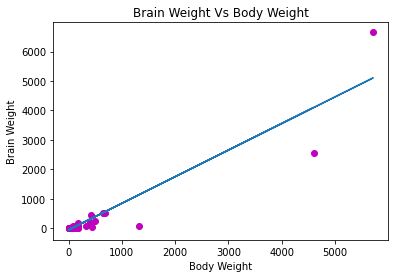

In [ ]:
# Task 2-->Chart the original data and the equation on the chart.
plt .scatter(df['Body'],df["Brain"],color='m')
plt.plot(df['Body'],model.predict(x))
plt.title('Brain Weight Vs Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [ ]:
# Task 3--> Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
print('Since the R2 score value is greater that .8 (ie : {:.4f}) we can say this equation is a good fit for this data.'.format(model.score(x,y)))

Since the R2 score value is greater that .8 (ie : 0.8727) we can say this equation is a good fit for this data.


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


array([3, 2, 1])

In [ ]:
# Task 1--> Find the linear regression equation for this data using columns 1-5 to column 6.
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354])

In [ ]:
print ('As this is a multi variate linear regression analysis ,the model will have the number of coefficients equal to number of features ')
print('let the feature variables be x1,x2,x3... as the feature distribution in the dataset')
print ("so the equation could be written as ")
print("y={:.4f} +{:.4f}*x1 + {:.4f}*x2 +{:.4f}*x3 +{:.4f}*x4 +{:.4f}*x5".format(model.intercept_,model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.coef_[4]))

As this is a multi variate linear regression analysis ,the model will have the number of coefficients equal to number of features 
let the feature variables be x1,x2,x3... as the feature distribution in the dataset
so the equation could be written as 
y=11410.1465 +1241.7925*x1 + 5586.1814*x2 +482.8598*x3 +-1331.6441*x4 +-128.7906*x5


In [ ]:
# Task 2-->>Find the selection of columns with the best  R2  score.
print('R2 score using all columns is {:.4f}'.format(model.score(x,y)))

R2 score using all columns is 0.8547


In [ ]:
from itertools import chain, combinations
combs = list(chain.from_iterable(combinations(df.columns[:-1], i)
                                   for i in range(2, len(df.columns[:-1]) + 1)))

dic = {}
for cols in combs:
  model_1 = LinearRegression()
  model_1.fit(df[list(cols)],y)
  dic[cols]= model_1.score(df[list(cols)],y)


dic= dict(sorted(dic.items(),reverse=True,key=lambda x:x[1]))
for i in dic.items():
  print(i)


(('Sex', 'Rank', 'Year', 'Degree', 'YSdeg'), 0.8547180674410969)
(('Sex', 'Rank', 'Year', 'YSdeg'), 0.8490366192262851)
(('Rank', 'Year', 'Degree', 'YSdeg'), 0.8485077204335426)
(('Rank', 'Year', 'YSdeg'), 0.8456725764485596)
(('Sex', 'Rank', 'Year', 'Degree'), 0.845547641297936)
(('Sex', 'Rank', 'Year'), 0.8454319861987166)
(('Rank', 'Year', 'Degree'), 0.8437395200874137)
(('Rank', 'Year'), 0.8436480933264597)
(('Sex', 'Rank', 'Degree', 'YSdeg'), 0.7671813414350668)
(('Sex', 'Rank', 'YSdeg'), 0.7666122610227071)
(('Rank', 'Degree', 'YSdeg'), 0.7625149185326454)
(('Rank', 'YSdeg'), 0.7623948189698249)
(('Sex', 'Rank', 'Degree'), 0.7583144768153613)
(('Rank', 'Degree'), 0.7557961688386643)
(('Sex', 'Rank'), 0.7554917749443394)
(('Sex', 'Year', 'Degree', 'YSdeg'), 0.6311597502907436)
(('Year', 'Degree', 'YSdeg'), 0.6236261611533503)
(('Sex', 'Degree', 'YSdeg'), 0.5832708257660315)
(('Sex', 'Year', 'YSdeg'), 0.5808063918180405)
(('Year', 'YSdeg'), 0.5782019226431887)
(('Degree', 'YSdeg'),

R2 score aand the feature used for is represented above :
the highest R2 score is attaint while using all the features . ie:0.8547180674410969 

[Text(0.5, 1.0, ' Salary Vs Sex with change in Rank')]

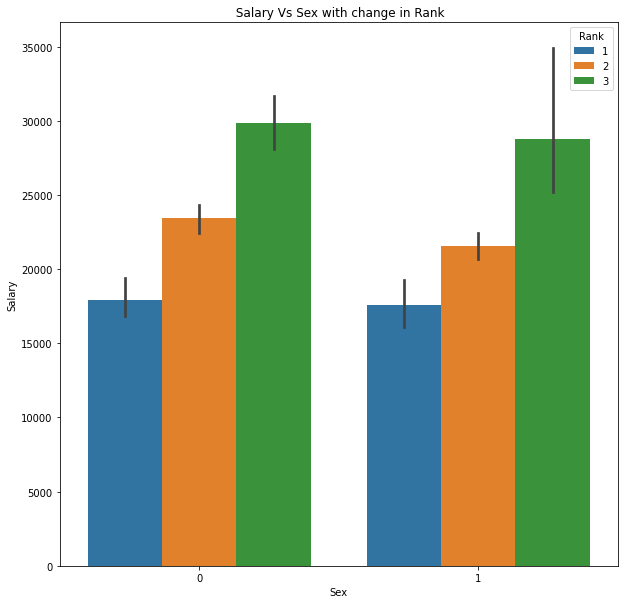

In [ ]:
# Task 3 --> Report whether sex is a factor in salary.
plt.figure(figsize=(10, 10))
sns.barplot(x='Sex', y='Salary', hue='Rank', data=df).set(title= ' Salary Vs Sex with change in Rank')


[Text(0.5, 1.0, 'Salary Vs Sex with change in Degree')]

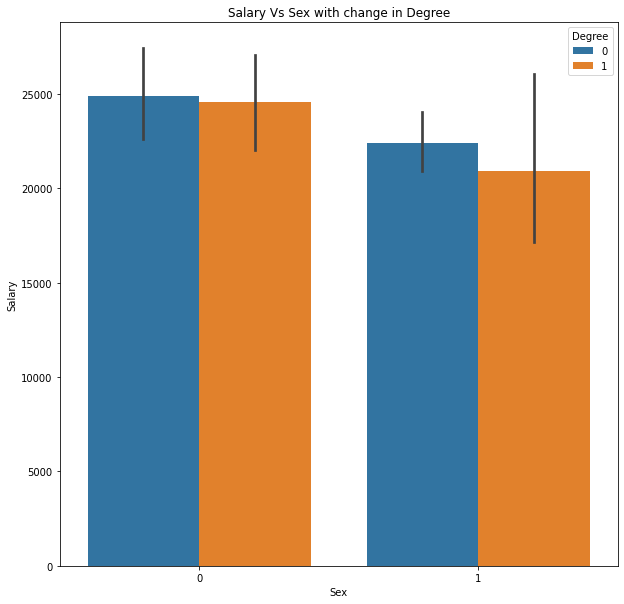

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Sex', y='Salary', hue='Degree', data=df).set(title= 'Salary Vs Sex with change in Degree')


In [ ]:
nums= df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(nums[0], nums[1]))

Num men: 38
Num women: 14


Slight variation in the graphs could be due to variation in no of men and women . 

There is no salary discrimination by sex 